# Create feature group for wine quality dataset

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import IPython.display as ipd
sns.set_palette("husl")
%matplotlib inline

In [46]:
import hopsworks
access_feature_store = True

if access_feature_store:
    project = hopsworks.login()
    fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/185497
Connected. Call `.close()` to terminate connection gracefully.


## Load data

In [47]:
wine_quality_red_df = pd.read_csv("winequality-red.csv", sep=";")
wine_quality_white_df = pd.read_csv("winequality-white.csv", sep=";")
print("Red wine CSV")
ipd.display(wine_quality_red_df.describe().round(3))
print("White wine CSV")
ipd.display(wine_quality_white_df.describe().round(3))

Red wine CSV


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


White wine CSV


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [48]:
# No missing values found in either dataset
nan_count_red = wine_quality_red_df.isna().sum()
nan_count_white = wine_quality_white_df.isna().sum()
print("Missing values - red wine CSV")
print(nan_count_red)
print("\nMissing values - white wine CSV")
print(nan_count_white)

Missing values - red wine CSV
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values - white wine CSV
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [49]:
# Concatenate the two dataframes
wine_quality_df = pd.concat([wine_quality_red_df, wine_quality_white_df], ignore_index=True)
# Make sure all columns are lowercase without spaces
wine_quality_df.columns = [col.replace(" ", "_").lower() for col in wine_quality_df.columns]

label_col = "quality"
feature_cols = wine_quality_df.columns[0:-1]

In [50]:
wine_quality_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile_acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric_acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual_sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free_sulfur_dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total_sulfur_dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
ph,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


The target column is very unbalanced, with the extreme values being either non-existent or very few.

In [51]:
wine_quality_df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

## Data Exploration

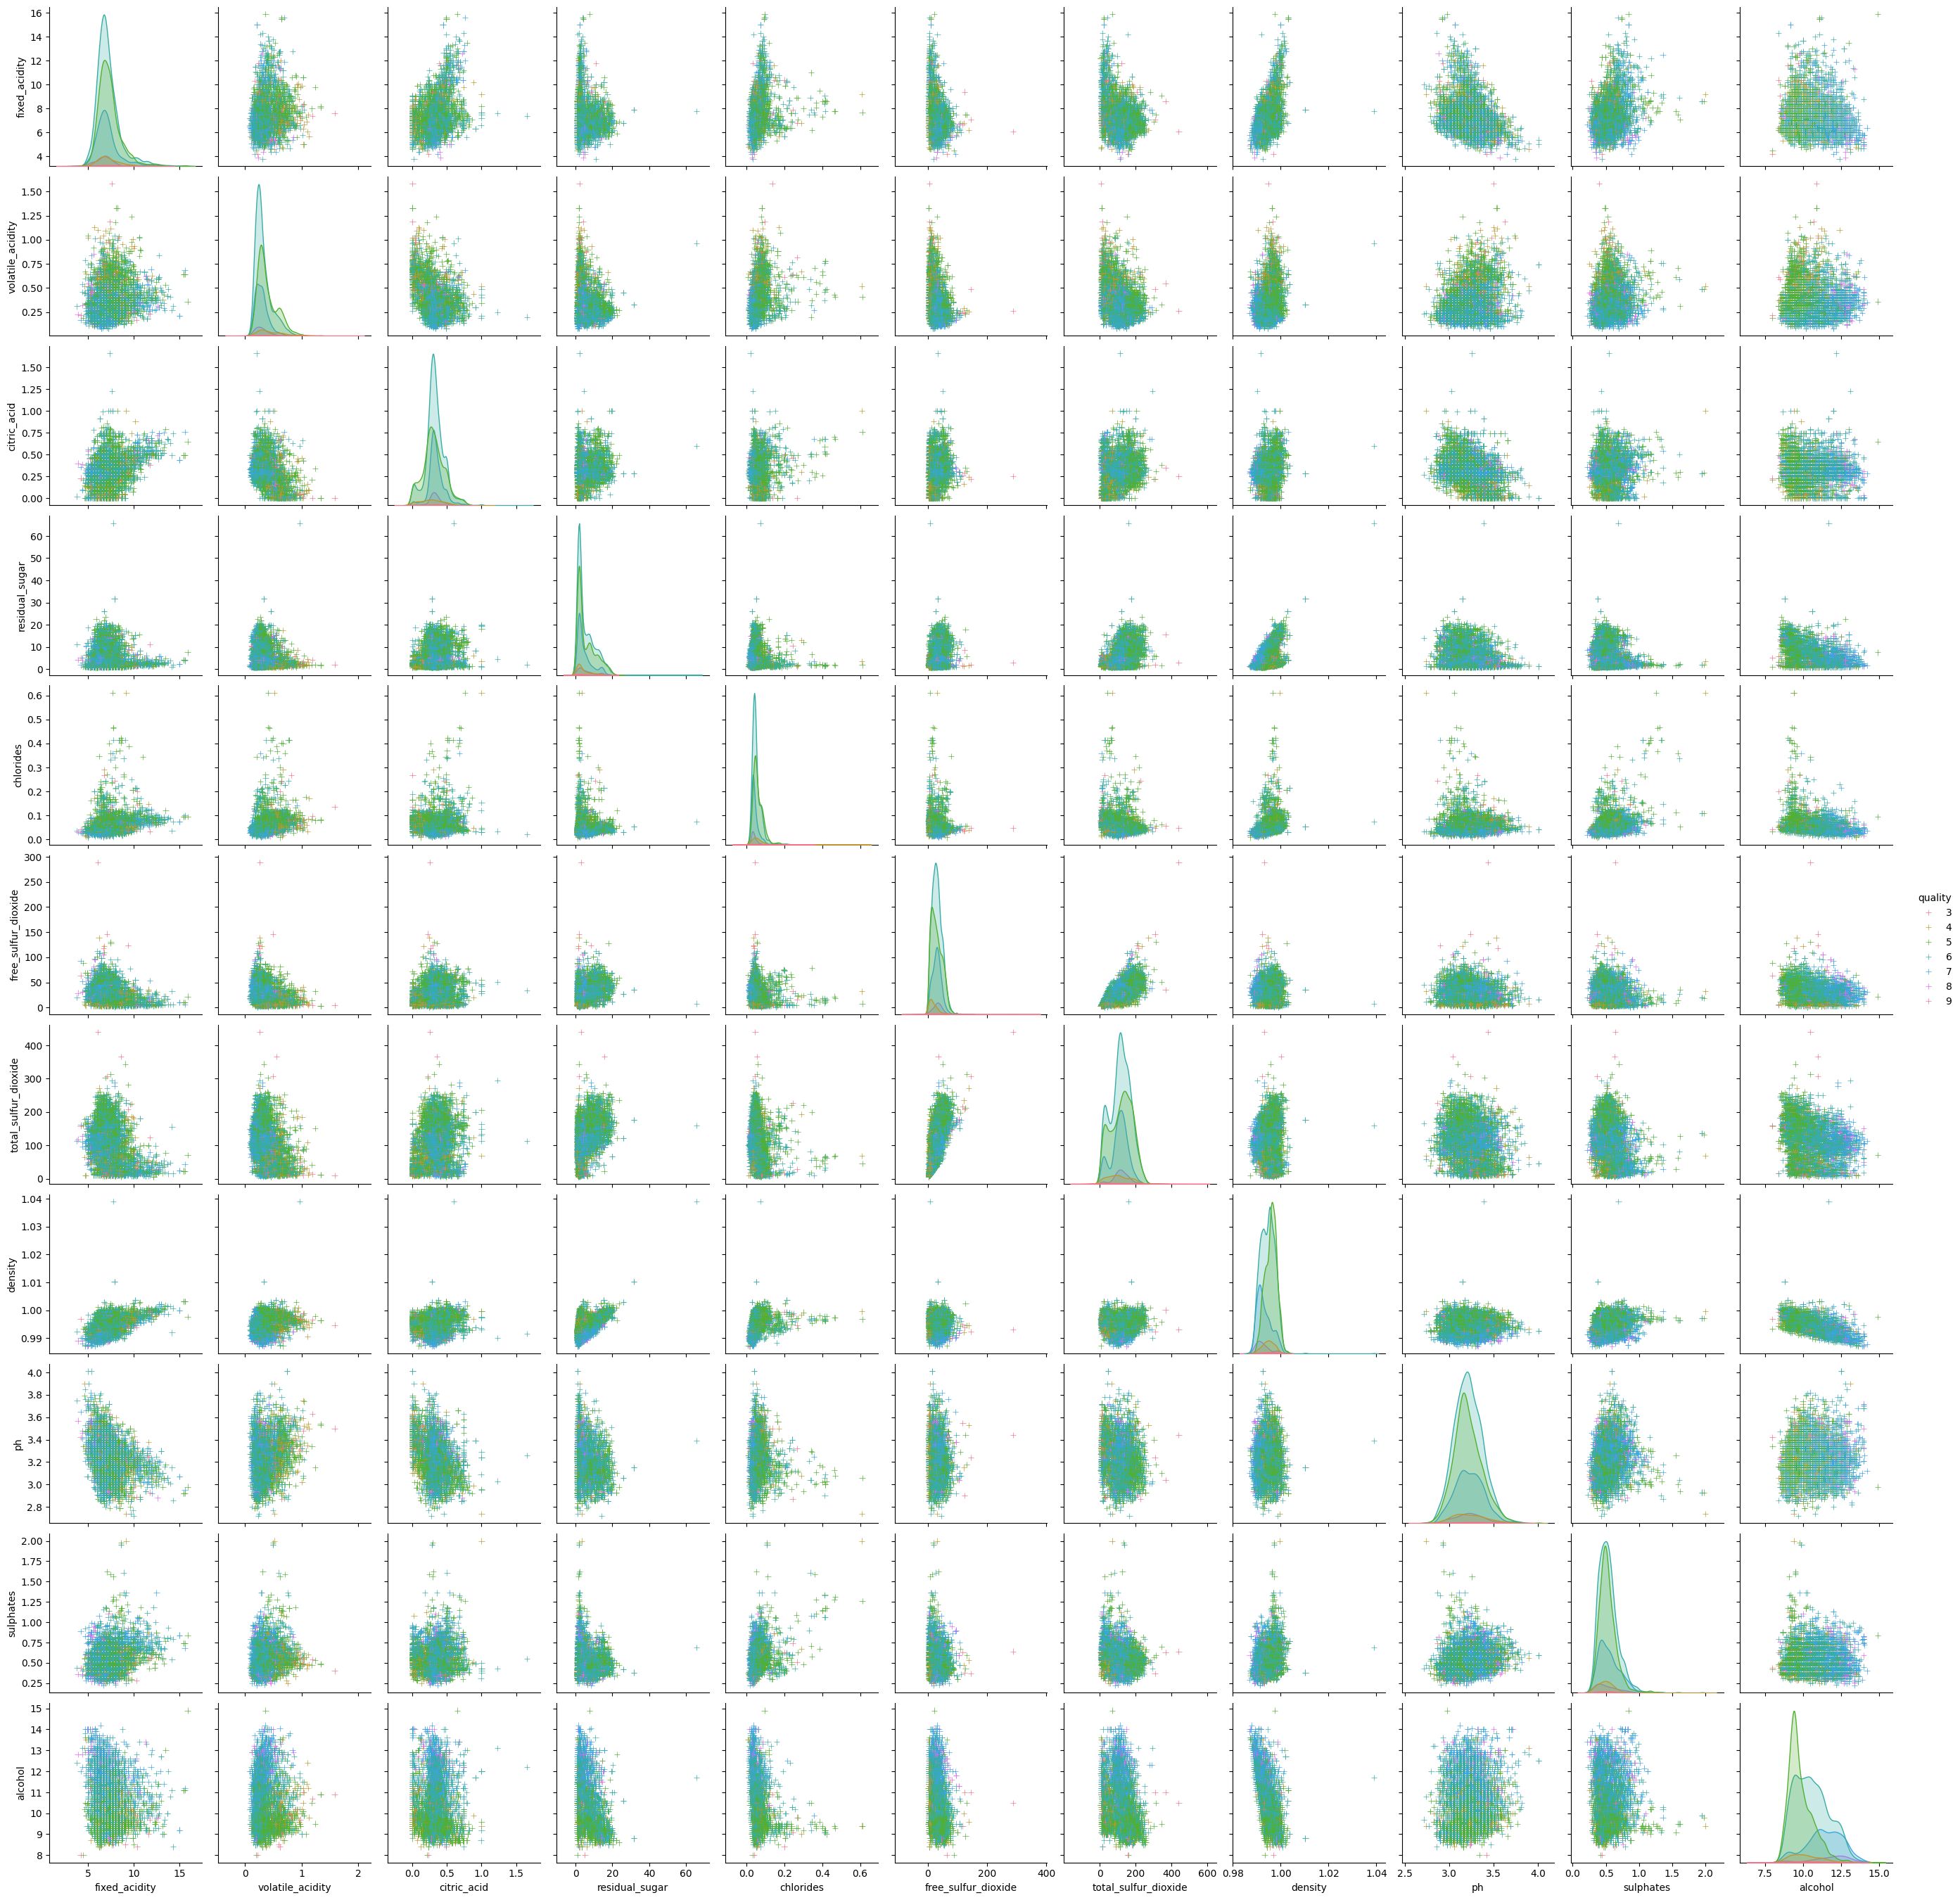

In [52]:
sns.pairplot(wine_quality_df, hue=label_col, markers='+', palette="husl")

In [53]:
corr = wine_quality_df.corr()
corr["quality"].sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
ph                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

2023-11-18 17:52:03,553 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:03,553 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


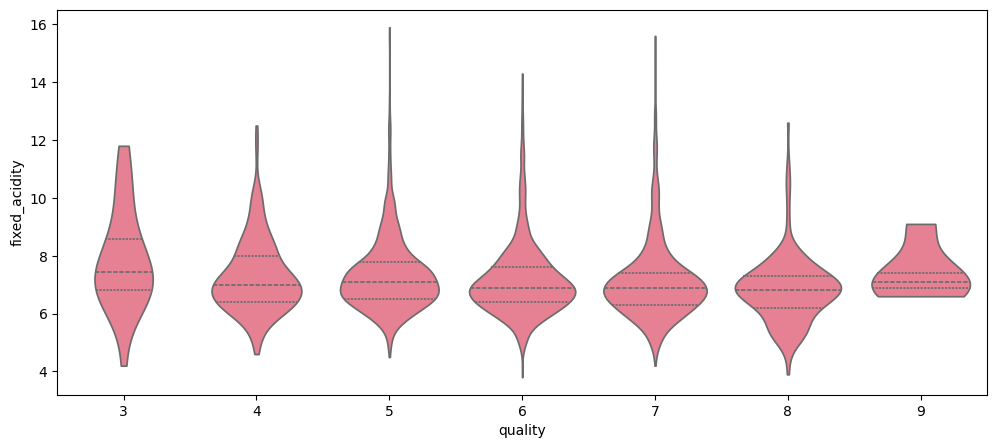

2023-11-18 17:52:03,773 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:03,791 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


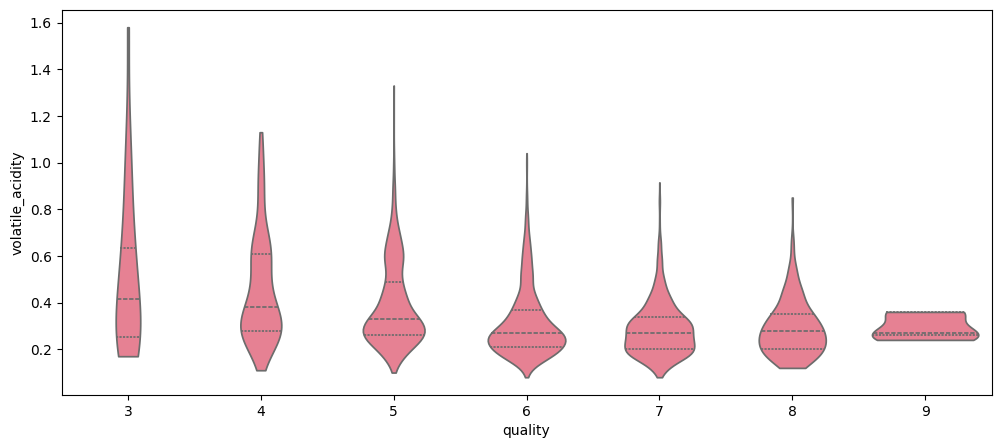

2023-11-18 17:52:03,962 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:03,969 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


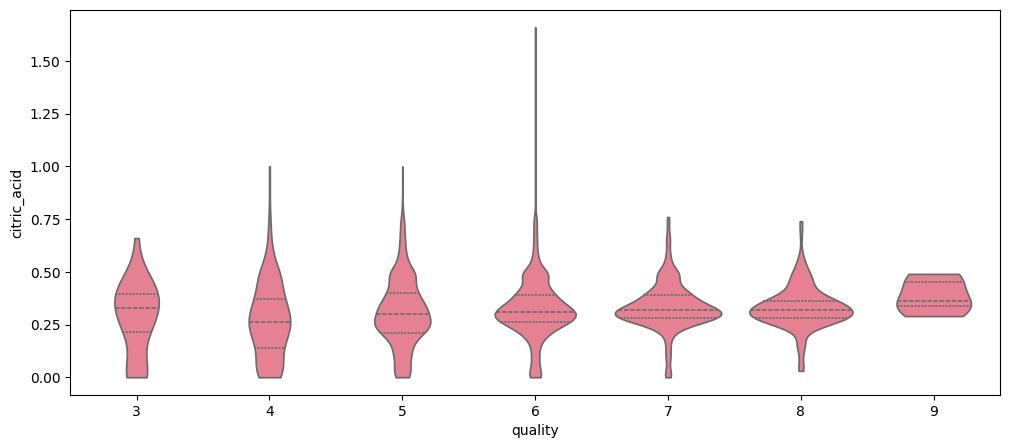

2023-11-18 17:52:04,144 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:04,153 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


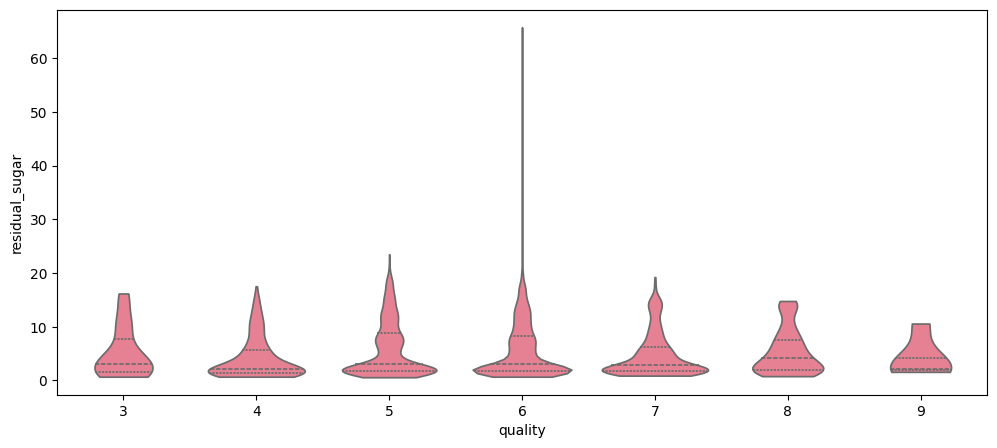

2023-11-18 17:52:04,358 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:04,371 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


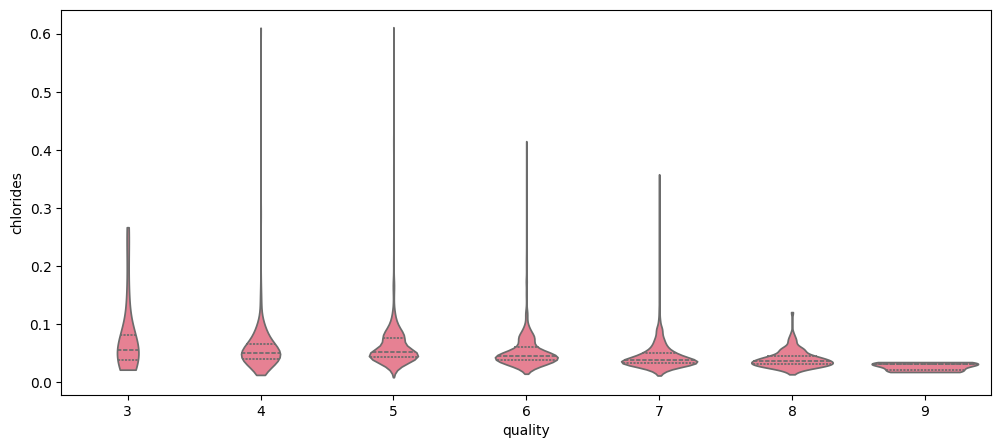

2023-11-18 17:52:04,554 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:04,572 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


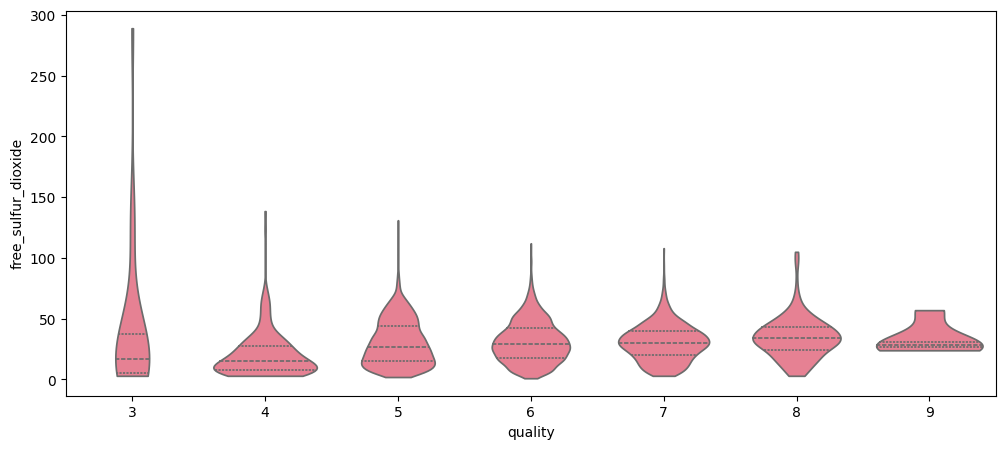

2023-11-18 17:52:04,813 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:04,829 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


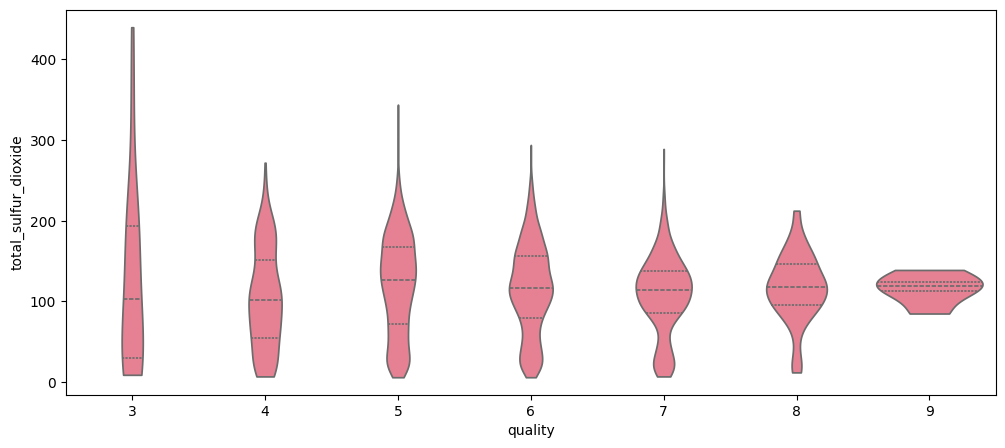

2023-11-18 17:52:05,028 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:05,038 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


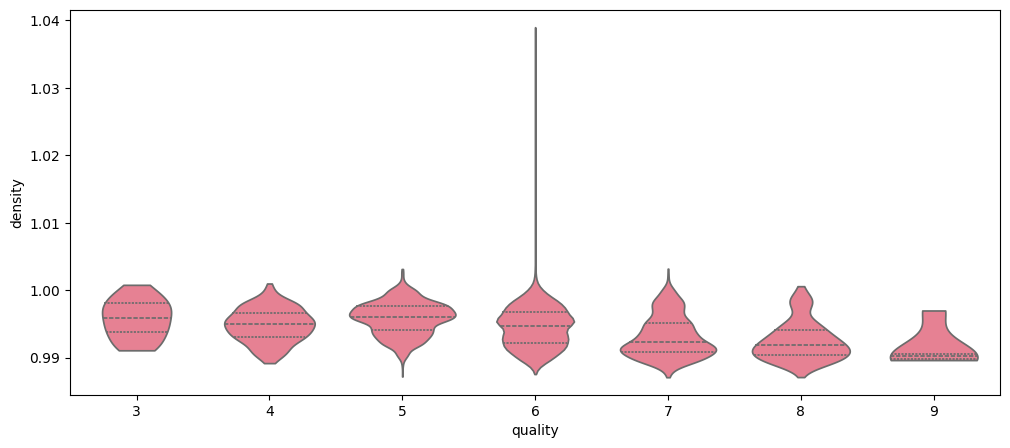

2023-11-18 17:52:05,231 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:05,247 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


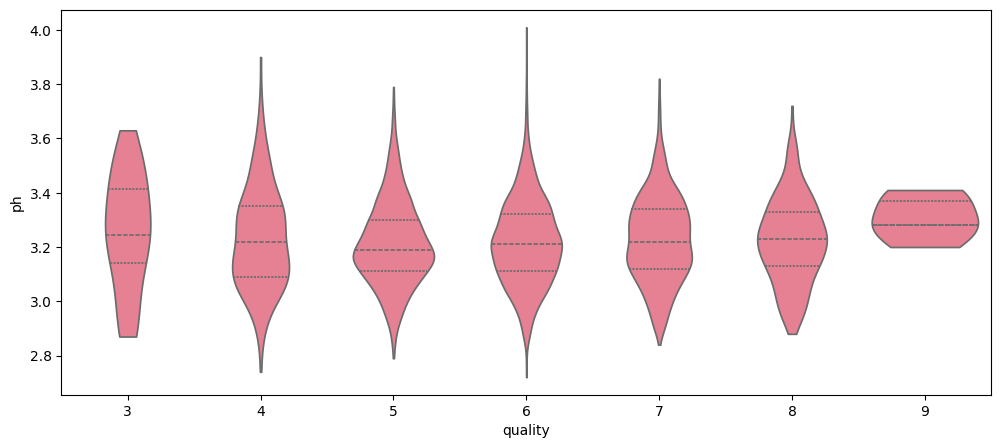

2023-11-18 17:52:05,446 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:05,455 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


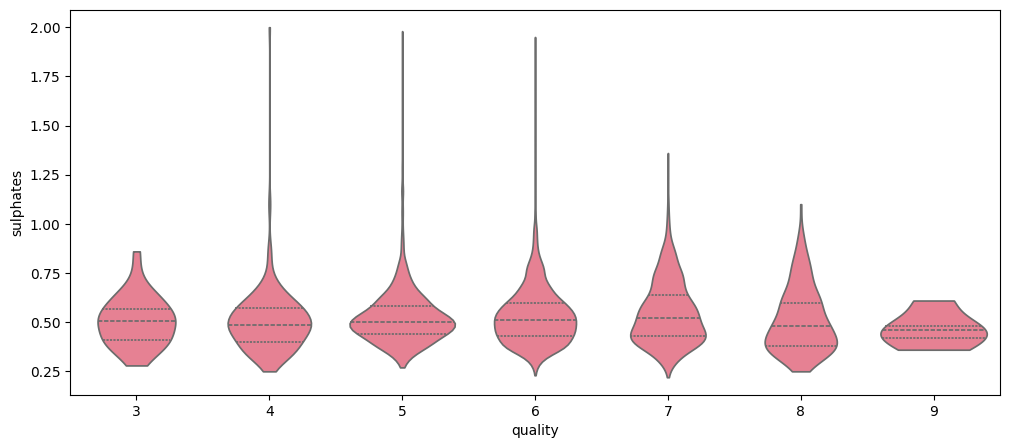

2023-11-18 17:52:05,670 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-18 17:52:05,671 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


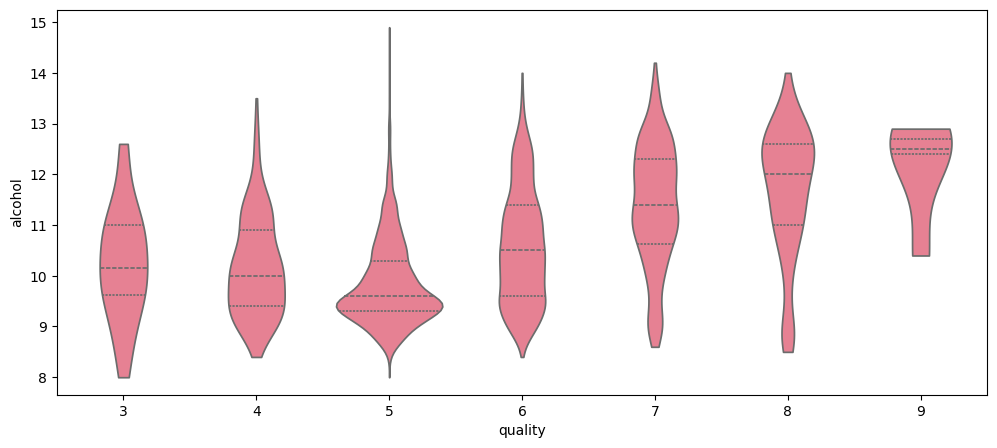

In [58]:
for col in feature_cols:
    fig = plt.figure(figsize=(12, 5))
    sns.violinplot(data=wine_quality_df, x="quality", y=col, inner="quartile", cut=0)
    plt.show()

## Create feature group

In [59]:
wine_quality_fg = fs.get_or_create_feature_group(
    name="wine_quality",
    version=1,
    primary_key=feature_cols, 
    description="Wine Quality Dataset")

wine_quality_fg.insert(wine_quality_df, overwrite=True)

Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:07 | Remaining Time: 00:00


Launching job: wine_quality_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/185497/jobs/named/wine_quality_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x20ec5985720>, None)